# Classification with AdaBoost on Titanic Data

### 1. Predicting Survived

In [32]:
import pandas as pd
import numpy as np
np.random.seed(12356)
df = pd.read_csv('titanic.csv')
# Assign input variables
X = df.loc[:,['Pclass','Sex','Age','Fare','Embarked','SibSp','Parch']]

# Assign target variable
y = df['Survived']

# Replace missing values by the median
X["Age"] = X["Age"].fillna(X["Age"].median())

# Impute the Embarked variable
X["Embarked"] = X["Embarked"].fillna("S")
# Change Pclass to categorical variable
X['Pclass'] = X['Pclass'].astype(object)

# Encode categorical variable
X = pd.get_dummies(X)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

from sklearn.ensemble import AdaBoostClassifier
r1 = AdaBoostClassifier(n_estimators=100, learning_rate=1)
r1.fit(x_train, y_train)
# Accuracry on test data
print("Testing Accuracy: ", r1.score(x_test, y_test))

Testing Accuracy:  0.835820895522388


### Variable Importance

<ipython-input-33-84913052abcb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values('Importance',inplace=True)


<AxesSubplot:ylabel='Variables'>

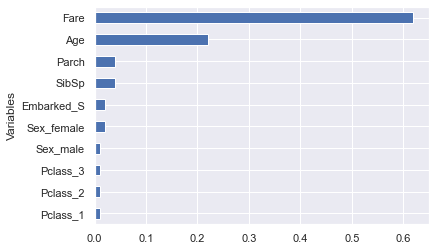

In [33]:
sorted_idx = (-r1.feature_importances_).argsort()

feature_importance = pd.DataFrame({'Variables':x_train.columns[sorted_idx], 'Importance':r1.feature_importances_[sorted_idx]})
df = feature_importance[:10]
df.sort_values('Importance',inplace=True)

df.plot(kind='barh',y='Importance',x='Variables', legend=False)

### Learning Rate

*Notice: The next two code cells will take a long time to run.  You can choose a smaller n2 to speed up the running time.*


Text(0.5, 1.1, 'Learning fast vs. slow')

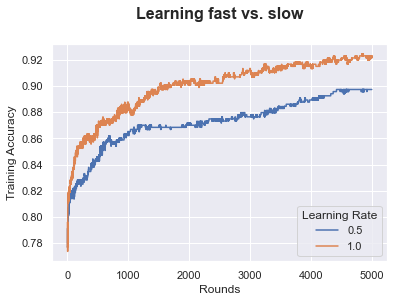

In [35]:
# Plot the Training Accuracy of adaboosts with n_estimators running from n1 to n2 and two learning rates l1 and l2. 

n1 = 1
n2 = 5000
l1 = .5
l2 = 1

ac = pd.DataFrame([], columns=list(['Rounds','Learning Rate','Accuracy']))
from sklearn.tree import DecisionTreeClassifier
for rs in range(n1, n2):
    for lr in [l1, l2]:
        boost = AdaBoostClassifier(n_estimators=rs, learning_rate=lr)
        boost.fit(x_train,y_train)
        ac = ac.append(pd.DataFrame([[rs, lr, boost.score(x_train,y_train) ]], 
                                    columns=list(['Rounds','Learning Rate','Training Accuracy'])), ignore_index=True)

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x="Rounds", y="Training Accuracy", hue =ac['Learning Rate'].astype('category'),data=ac)
ax.text(x=0.5, y=1.1, s='Learning fast vs. slow', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)

Text(0.5, 1.1, 'Learning fast vs. slow')

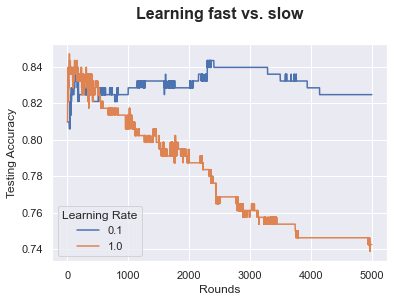

In [36]:
# Plot the Testing Accuracy of adaboosts with n_estimators running from n1 to n2 and two learning rates l1 and l2. 

n1 = 1
n2 = 5000
l1 = .1
l2 = 1

ac = pd.DataFrame([], columns=list(['Rounds','Learning Rate','Accuracy']))
from sklearn.tree import DecisionTreeClassifier
for rs in range(n1, n2):
    for lr in [l1, l2]:
        boost = AdaBoostClassifier(n_estimators=rs, learning_rate=lr)
        boost.fit(x_train,y_train)
        ac = ac.append(pd.DataFrame([[rs, lr, boost.score(x_test,y_test) ]], 
                                    columns=list(['Rounds','Learning Rate','Testing Accuracy'])), ignore_index=True)

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(x="Rounds", y="Testing Accuracy", hue =ac['Learning Rate'].astype('category'),data=ac)
ax.text(x=0.5, y=1.1, s='Learning fast vs. slow', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)

### 2. Practice

Predicting Breast Cancer.

1. Import the breast cancer dataset. The data can be downloaded at this [link](https://bryantstats.github.io/math460/breast_cancer.csv)

2. Set the input (X) and output (y). Split the data into 60% training and 40% testing

3. Train an adaboost with 200 n_estimators and .1 learning rare. What is testing accuracy of the adaboost?

4. What is the most important variable according to the above adatboost model in predicting breast cancer?

5. Find an adaboost that have a higher testing accuracy than the above adaboost. What is the n_estimators and learning of this adaboost? 